In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

In [5]:
path =r"D:\python_notes2\theroy\tips (1).csv"
print(path)

D:\python_notes2\theroy\tips (1).csv


In [7]:
file = pd.read_csv(path)
file

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
file.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
file.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [12]:
cat= list(file.columns[file.dtypes =="object"])
cat

['sex', 'smoker', 'day', 'time']

In [16]:
con = list(file.columns[file.dtypes !="object"])
con

['total_bill', 'tip', 'size']

descripitive staticsies

In [17]:
file[con].describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [18]:
file[cat].describe().T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [22]:
file["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [25]:
file["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [26]:
file.agg({"total_bill":"median"})

total_bill    17.795
dtype: float64

In [27]:
file.agg({
    "total_bill":[ "min","max" ]
     })

,total_bill
min,3.07
max,50.81


In [30]:
file.groupby(by ="day") \
.agg({"total_bill":"median"})\
 .sort_values(by ="total_bill")


,total_bill
day,
Fri,15.38
Thur,16.20
Sat,18.24
Sun,19.63


In [33]:
graph=file.groupby(by="day")\
    .agg({"total_bill": "median"})\
    .sort_values(by = "day")
graph

,total_bill
day,
Fri,15.38
Sat,18.24
Sun,19.63
Thur,16.20


<Axes: xlabel='day'>

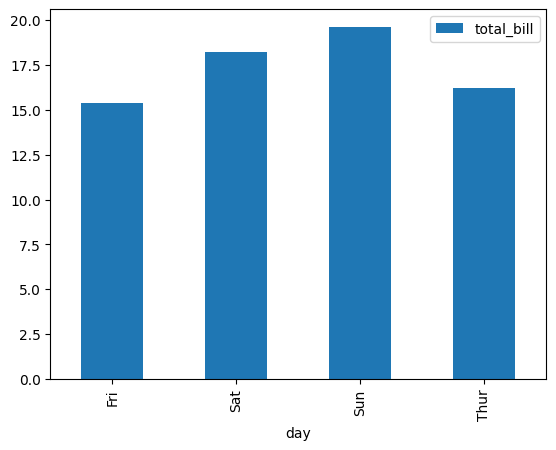

In [34]:
graph.plot(kind ="bar")

In [35]:
file.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [43]:
graph2=file.groupby(by ="sex")\
.agg({"size": "max"})\
.sort_values(by ="size")

<Axes: xlabel='sex'>

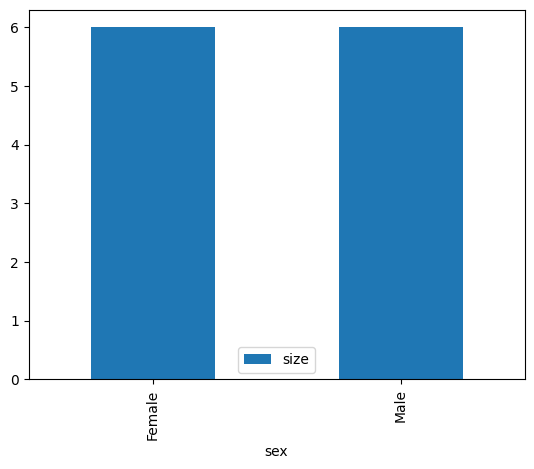

In [44]:
graph2.plot(kind= "bar")

In [45]:
graph3 = file.groupby(by =["day","time"])\
.agg({"total_bill":["max","min","median"]})

In [46]:
graph3

total_bill               
                   max    min  median
day  time                            
Fri  Dinner      40.17   5.75  18.665
     Lunch       16.27   8.58  13.420
Sat  Dinner      50.81   3.07  18.240
Sun  Dinner      48.17   7.25  19.630
Thur Dinner      18.78  18.78  18.780
     Lunch       43.11   7.51  16.000

<Axes: ylabel='day,time'>

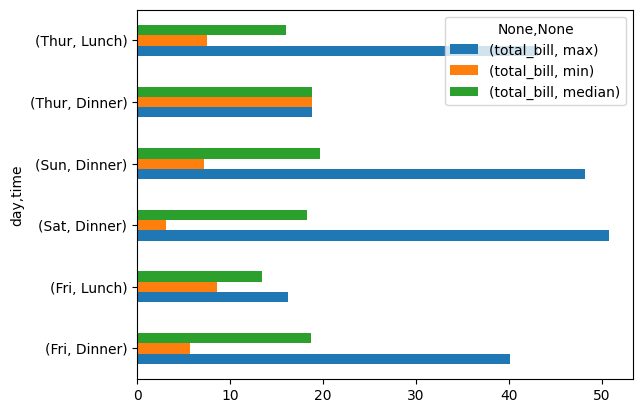

In [47]:
graph3.plot(kind="barh")